In [1]:
import pandas as pd
import numpy as np
from utils import ThresholdAndFeretBoxEvaluator, plot_mean_results_per_something
from assemble_metadata import (
    CLASS_NAME,
    OBJ_ID,
    BACKGROUND,
    DATE,
    IMG_PATH,
    IMG_VIEW,
    IMG_TRANSFORM,
    INDOOR,
    THRESHOLD_METHOD,
)

#Loading some needed data
gray_imgs_df = pd.read_csv('gray_imgs_dataset_metadata.csv')
ground_truth_segmented_df = pd.read_csv('ground_truth_dataset_metadata.csv')
otsu_segmented_df = pd.read_csv('otsu_segmented_dataset_metadata.csv')
evaluator = ThresholdAndFeretBoxEvaluator(ground_truth_segmented_df, otsu_segmented_df)

### 1. Comparing the ground truth segmented images with the ones that were segmented algorithmically

To evaluate the performance of the image thresholing algorithms that were used, we'll use two metrics:

- **Dice coefficient**: The Dice coefficient is a statistic used to gauge the similarity of two samples. It is calculated as twice the number of pixels common to both images divided by the total number of pixels in both images. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth.
- **Jaccard index**: The Jaccard index, also known as the Jaccard similarity coefficient, is a statistic used for comparing the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets. In the context of image segmentation, the Jaccard index can be used to compare how similar the predicted segmentation is to the ground truth if pixels are considered sample sets.



In [2]:
method = "otsu_bin"
results_df = evaluator.evaluate_segmentation(method)
results_df.to_csv(f"thresholding_and_feret_box_results.csv", index=False)

We'll first analyze the general results for each thresholding algorithm without breaking into the details by class

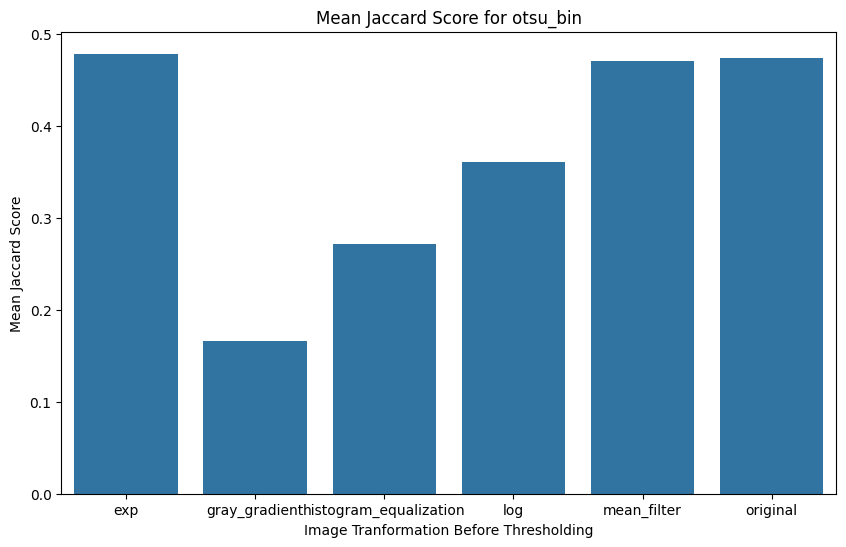

In [3]:
results_df = pd.read_csv(f"thresholding_and_feret_box_results.csv")

methods = results_df[THRESHOLD_METHOD].unique()
for method in methods:
    title = f"Mean Jaccard Score for {method}"
    xlabel,ylabel = "Image Tranformation Before Thresholding", "Mean Jaccard Score"
    plot_mean_results_per_something(results_df[results_df[THRESHOLD_METHOD] == method], IMG_TRANSFORM, "jaccard_score", xlabel, ylabel, title)

Now, we'll break the results down by class

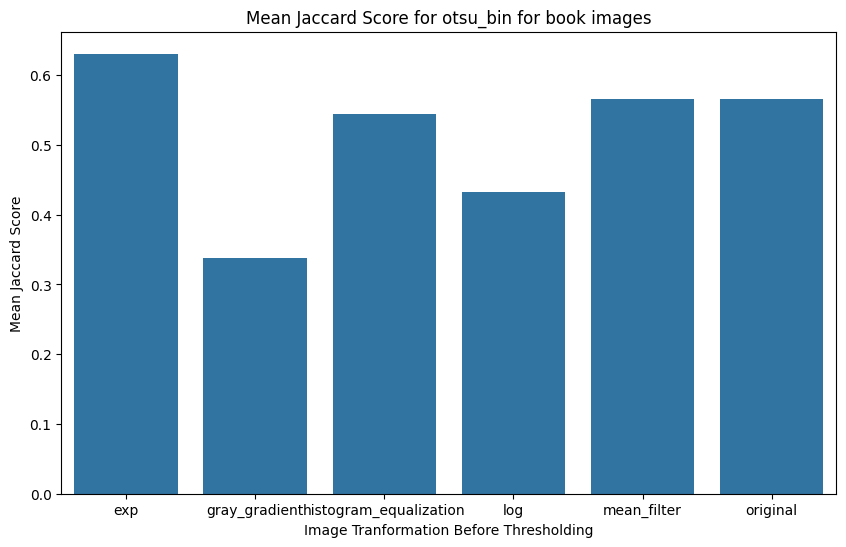

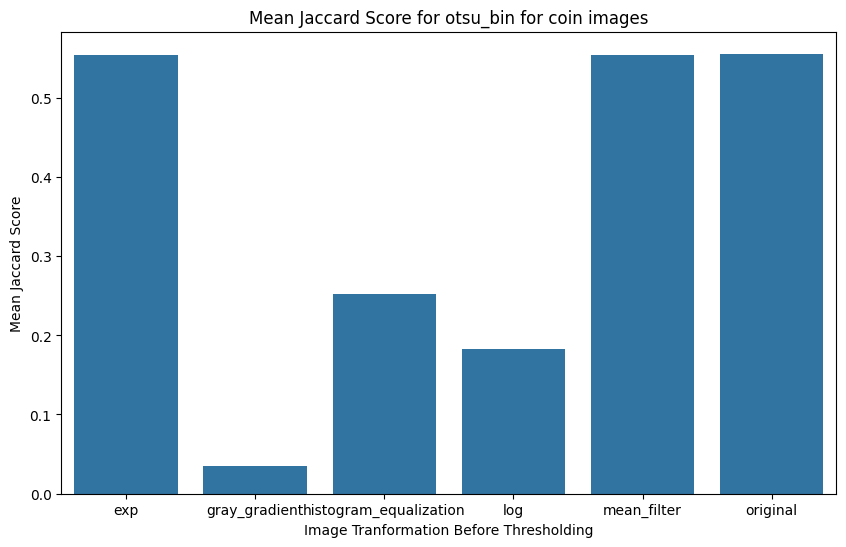

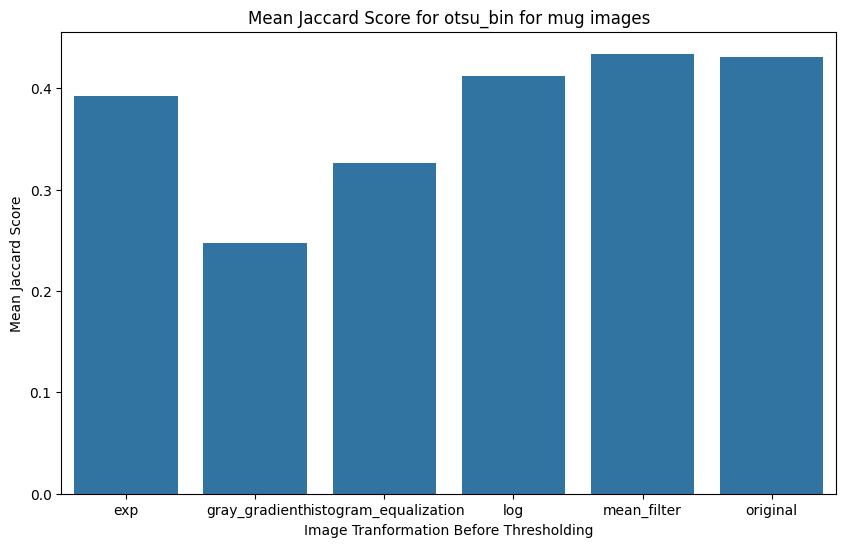

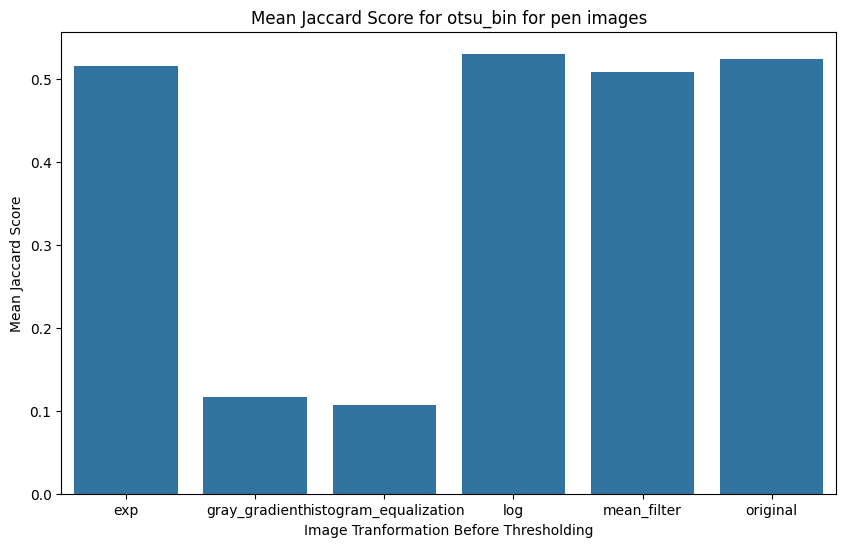

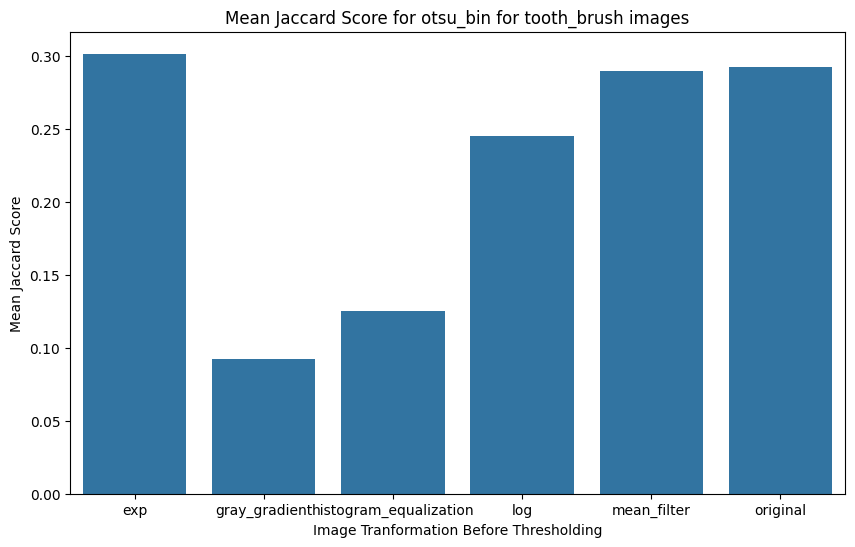

In [4]:
img_classes = results_df[CLASS_NAME].unique()
for img_class in img_classes:
    for method in methods:
        title = f"Mean Jaccard Score for {method} for {img_class} images"
        xlabel,ylabel = "Image Tranformation Before Thresholding", "Mean Jaccard Score"
        plot_mean_results_per_something(results_df[(results_df[THRESHOLD_METHOD] == method) & (results_df[CLASS_NAME] == img_class)], IMG_TRANSFORM, "jaccard_score", xlabel, ylabel, title)